In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [6]:
df = pd.read_csv("combined_dataset_topic_emotion_labeled.csv")

In [32]:
df.head()

,user_name,full_name,text,taken_at,like_count,code,partei,topic,emotion
0,afd.bund,Alternative für Deutschland,Schon 40.000 AfD-Mitglieder: Machen Sie auch m...,2024-01-02,15060,C1mbJ91Nbri,AfD,Government,Freude
1,afd.bund,Alternative für Deutschland,„Die AfD ist die #Freiheitspartei. Niemand sol...,2023-06-12,20496,CtYVop4NI9S,AfD,Civil,Angst
2,afd.bund,Alternative für Deutschland,Nach dem Fall Loretta B.: Bekämpft die Messerg...,2024-03-18,6378,C4q5h_WNqXr,AfD,Law,Ärger
3,afd.bund,Alternative für Deutschland,Bei der Befragung von Bundeskanzler Olaf #Scho...,2024-03-18,1722,C4pt-nYtOOT,AfD,Immigration,Trauer
4,afd.bund,Alternative für Deutschland,Faeser will Grenzkontrollen nur während der EM...,2024-03-17,5447,C4nAd2Nttpv,AfD,Law,Trauer


In [11]:
df["topic"].value_counts()

topic
Government        3933
Civil             1600
International     1585
Social             865
Macroeconomics     802
Domestic           775
Immigration        561
Energy             503
Agriculture        436
Labor              431
Technology         428
Health             417
Law                395
Transportation     394
Environment        333
Defense            300
Education          233
Housing            127
Culture             91
Public              58
Foreign             22
Error               22
Name: count, dtype: int64

In [17]:
topic_parties = df.groupby(['partei', 'topic']).size().reset_index(name='count').sort_values(['partei', 'count'], ascending=[True, False])

top_topics_parties = topic_parties.groupby('partei').head(5)

In [43]:
top_topics_parties

,partei,topic,count
10,AfD,Government,1247
1,AfD,Civil,271
13,AfD,Immigration,144
14,AfD,International,127
16,AfD,Law,113
30,BSW,Government,42
24,BSW,Defense,41
34,BSW,International,40
36,BSW,Macroeconomics,20
37,BSW,Social,11


In [25]:
farben = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173', '#bd9e39',
    '#ad494a', '#d6616b', '#31a354', '#cedb9c', '#e7ba52', '#e7cb94'
]

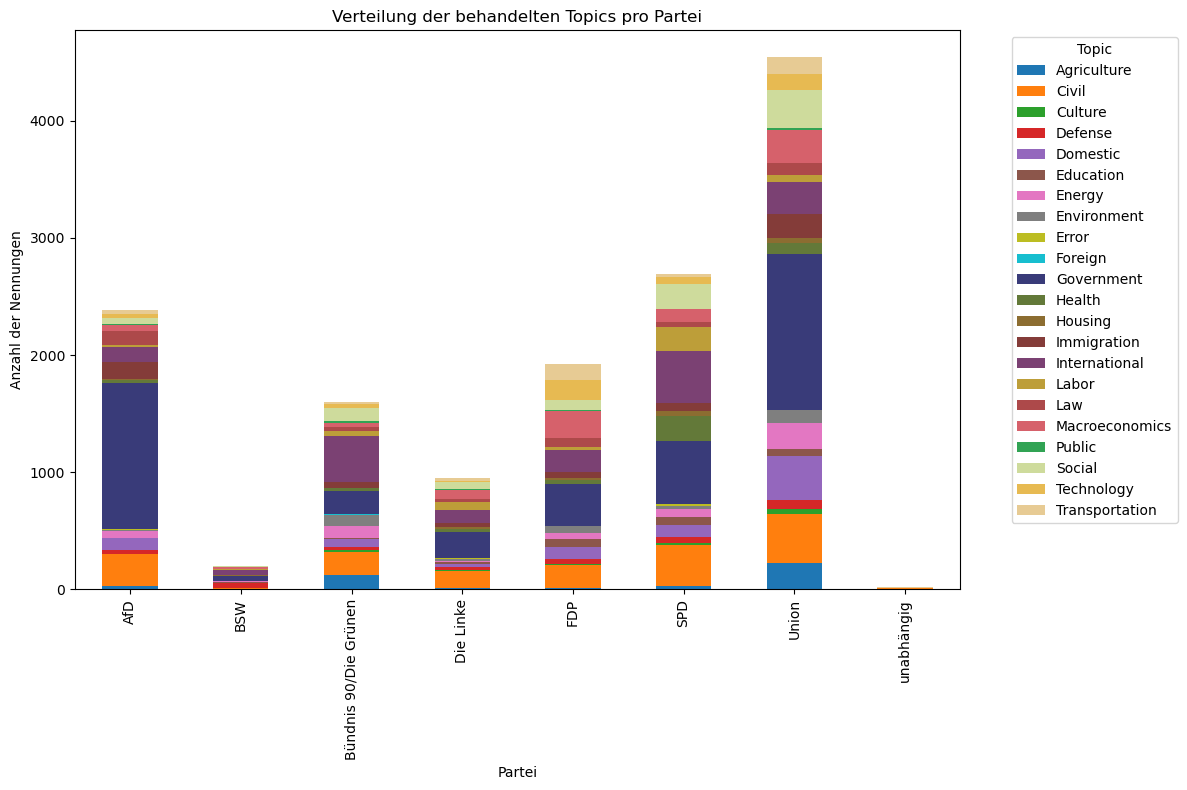

In [28]:
topic_plot = df.groupby(['partei', 'topic']).size().unstack(fill_value=0)

topic_plot.plot(kind='bar', stacked=True, figsize=(12, 8), color=farben)
plt.title('Verteilung der behandelten Topics pro Partei')
plt.xlabel('Partei')
plt.ylabel('Anzahl der Nennungen')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('verteilung_der_topics_pro_partei.png')

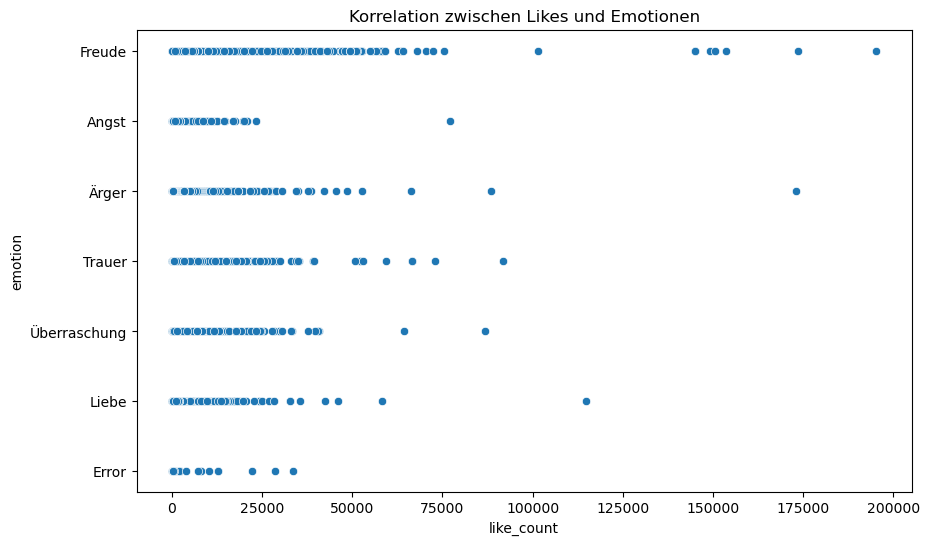

In [51]:
# Korrelation zwischen Likes und Emotionen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='like_count', y='emotion')
plt.title('Korrelation zwischen Likes und Emotionen')
plt.savefig('korrelation_likes_emotionen.png')
plt.show()



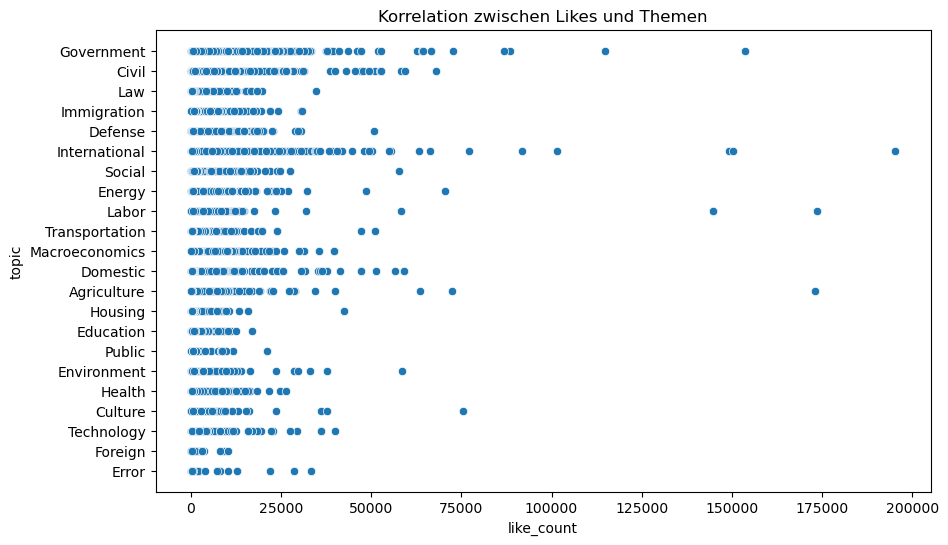

In [49]:
# Korrelation zwischen like_count und Themen
# Korrelation zwischen Likes und Themen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='like_count', y='topic')
plt.title('Korrelation zwischen Likes und Themen')
plt.savefig('korrelation_likes_topics.png')
plt.show()

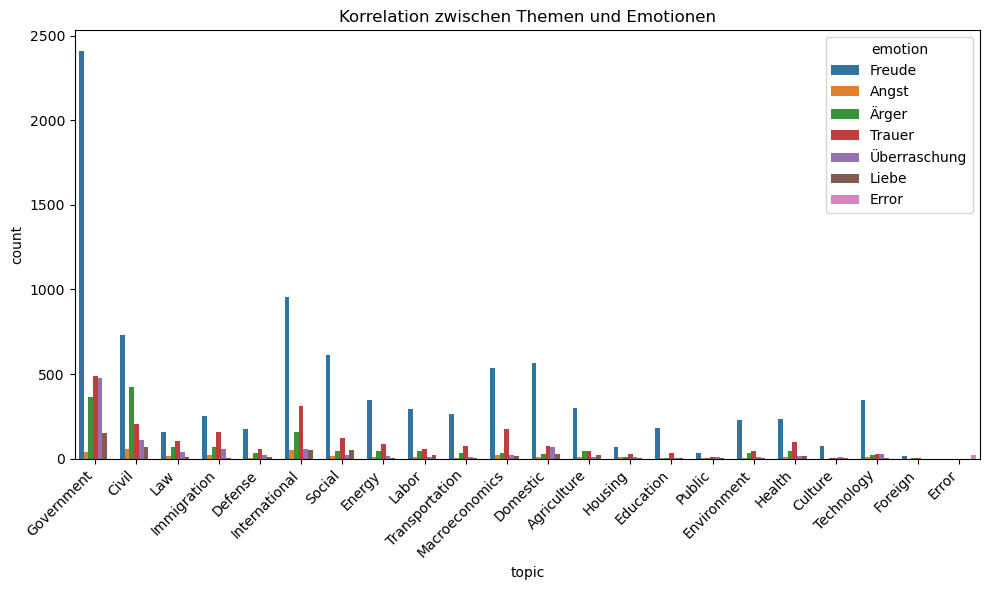

In [56]:
# Korrelation zwischen Themen und Emotionen
plt.figure(figsize=(10, 6))  # Anpassung der Größe der Abbildung
sns.countplot(data=df, x='topic', hue='emotion')
plt.title('Korrelation zwischen Themen und Emotionen')
plt.xticks(rotation=45, ha='right')  # Anpassung der Rotation und Ausrichtung der Labels
plt.tight_layout()  # Sicherstellen, dass alle Elemente innerhalb der Abbildung angezeigt werden
plt.savefig('korrelation_topics_emotion.png')
plt.show()

In [55]:
anova_topic = f_oneway(*[df['like_count'][df['topic'] == topic] for topic in df['topic'].unique()])
print("Korrelation zwischen Likes und Topic (ANOVA):", anova_topic)

Korrelation zwischen Likes und Topic (ANOVA): F_onewayResult(statistic=9.838854876000093, pvalue=3.3140848895200517e-32)


In [58]:
anova_emotion = f_oneway(*[df['like_count'][df['emotion'] == emotion] for emotion in df['emotion'].unique()])
print("Korrelation zwischen Likes und Emotion (ANOVA):", anova_emotion)

Korrelation zwischen Likes und Emotion (ANOVA): F_onewayResult(statistic=6.55732918330915, pvalue=6.263714337971924e-07)
